In [ ]:
!pip install meteostat pandas
!pip install matplotlib

In [ ]:
from datetime import datetime
import meteostat as mt
import pandas as pd
from meteostat import Point, Daily

### **Temperature Trend**

In [ ]:
from meteostat import Point, Daily
import pandas as pd
from datetime import datetime

# Define the location (latitude, longitude, and elevation)
location = Point(22.3193, 114.1694, 0)  # Example: Hong Kong

# Define the time range
start_date = datetime(1990, 1, 1)
end_date = datetime(2024, 12, 31)

# Fetch daily weather data
data = Daily(location, start_date, end_date)
data = data.fetch()

# Aggregate to yearly summary
yearly_data = data.resample('YE').agg({
    'tavg': 'mean',  # Average temperature
    'tmin': 'min',   # Minimum temperature
    'tmax': 'max',   # Maximum temperature
    'prcp': 'sum',   # Total precipitation
    'snow': 'sum',   # Total snowfall
    'wspd': 'mean',  # Average wind speed
    'pres': 'mean'   # Average pressure
})

# Display the data
print(yearly_data)


                 tavg  tmin  tmax    prcp  snow       wspd         pres
time                                                                   
1990-12-31  23.722466   7.0  36.3    45.0   0.0  15.827901         <NA>
1991-12-31   24.11456   5.0  37.0    35.9   0.0  14.275623         <NA>
1992-12-31  23.580495   8.1  36.0  3534.4   0.0  14.413521         <NA>
1993-12-31  23.692857   6.0  34.0  1811.5   0.0  14.185196         <NA>
1994-12-31  24.226374   7.4  35.0  2233.5   0.0  14.603933         <NA>
1995-12-31   23.33489  -2.7  34.5  2251.7   0.0  14.866667         <NA>
1996-12-31  23.848907   7.0  37.0  2059.7   0.0  13.766759         <NA>
1997-12-31  24.025549   9.7  35.0  3187.7   0.0  13.041274         <NA>
1998-12-31  24.493132   9.0  35.0  2559.9   0.0   13.04382         <NA>
1999-12-31  24.166116   8.8  36.0   103.9   0.0  13.558873         <NA>
2000-12-31  24.019399   0.3  35.0   153.1   0.0  13.533699         <NA>
2001-12-31  24.184573   9.7  35.0     0.0   0.0  15.101923  1004

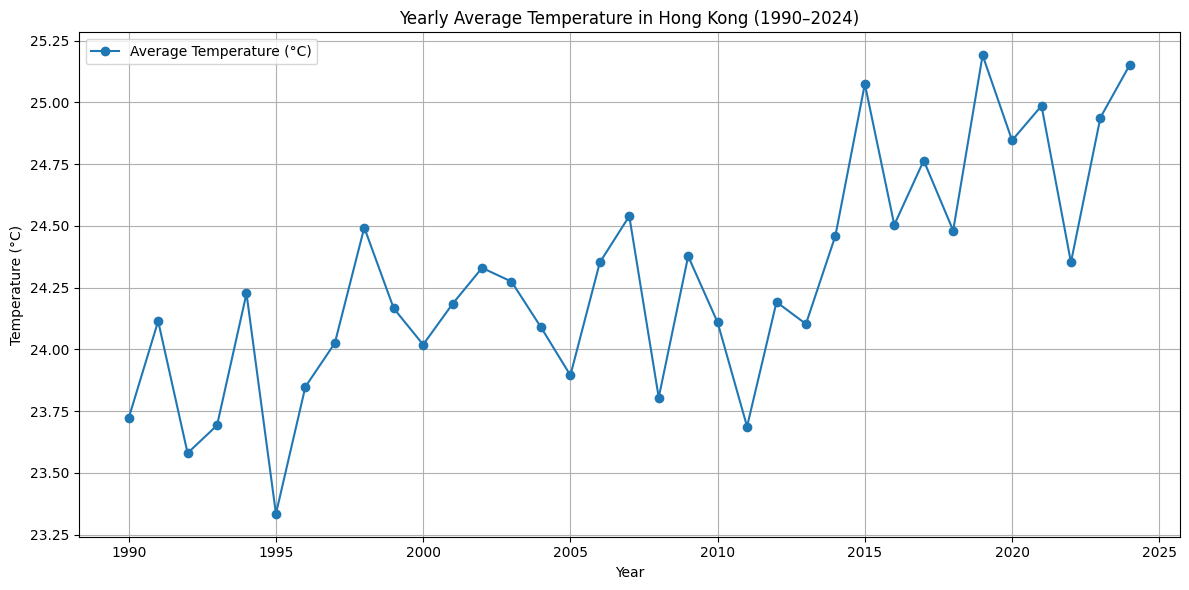

In [ ]:
import matplotlib.pyplot as plt

# 設定圖表大小
plt.figure(figsize=(12, 6))

# 畫出平均氣溫折線圖
plt.plot(yearly_data.index.year, yearly_data['tavg'], marker='o', label='Average Temperature (°C)')

# 加上標題與標籤
plt.title('Yearly Average Temperature in Hong Kong (1990–2024)')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

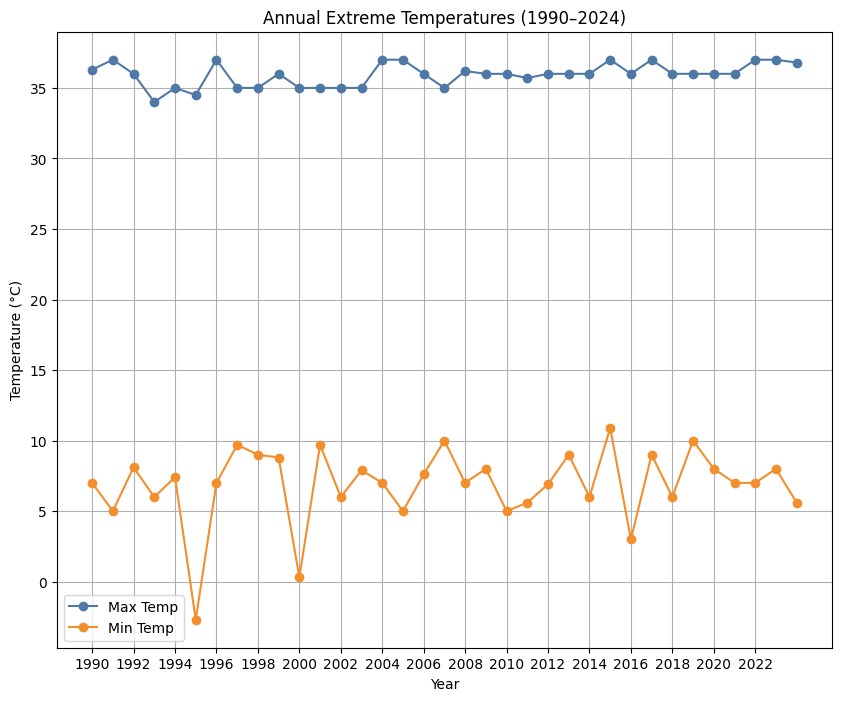

In [ ]:
yearly_extremes = yearly_data.groupby(yearly_data.index.year).agg({'tmax': 'max', 'tmin': 'min'}).reset_index()

plt.figure(figsize=(10, 8))
plt.plot(yearly_extremes['time'], yearly_extremes['tmax'], label='Max Temp', color='#4e79a7', marker='o')
plt.plot(yearly_extremes['time'], yearly_extremes['tmin'], label='Min Temp', color='#f28e2c', marker='o')
plt.title('Annual Extreme Temperatures (1990–2024)')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.xticks(range(1990, 2024, 2))  # Adjust x-axis ticks for clarity
plt.show()

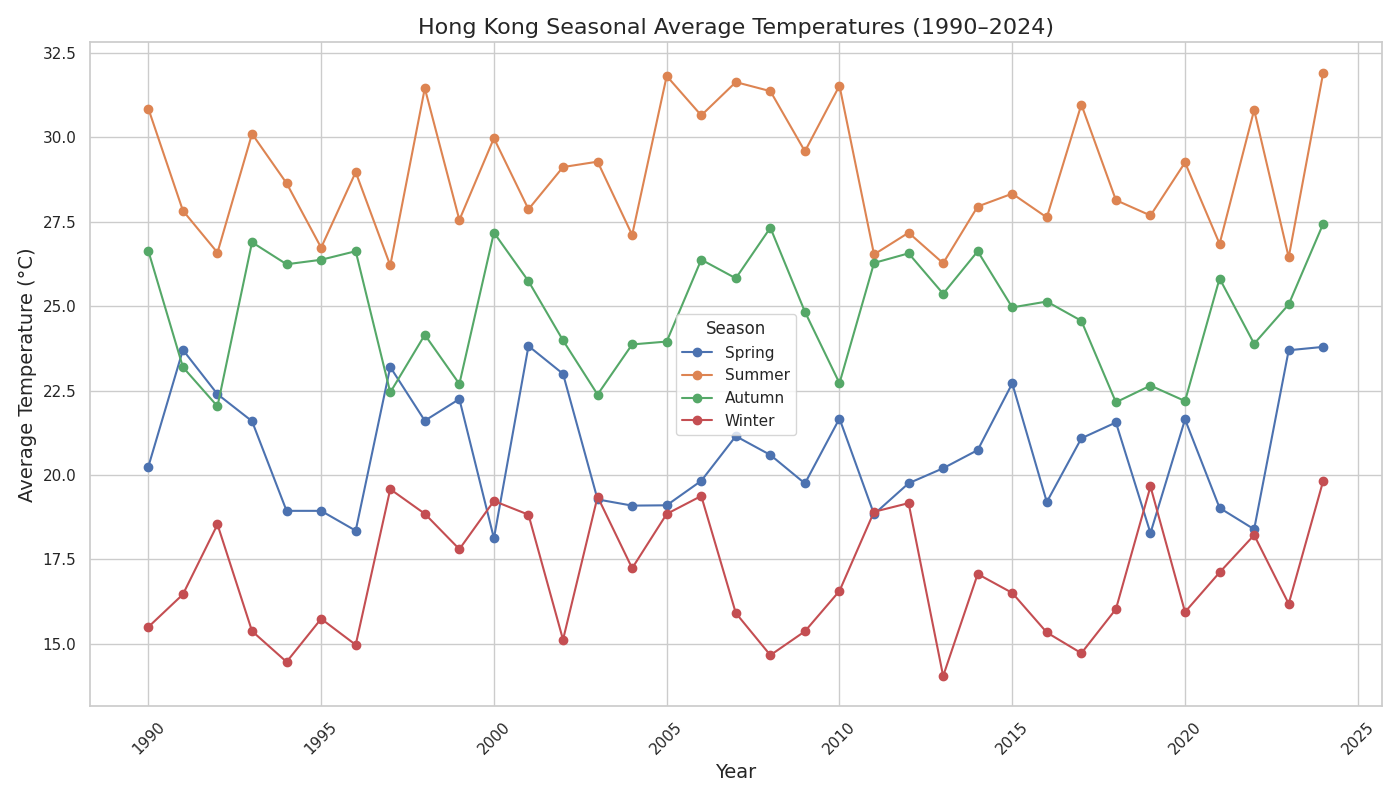

### **Yearly Total precipitaion**